##### Creating a model based on the MNIST Dataset of Handwritten Digits

In [31]:
# Importing all the packages
import tensorflow
import  numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# loading yhe dataset
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(y_train.shape)

(60000,)


In [3]:
# Printing the number of samples in x_train, x_test, y_train, y_test

print("Initial shape or dimension of x_train", x_train.shape)


print("Number of labels in our training data:", len(y_train))
print("Number of samples in our test data: " + str(len(x_test)))
print("Number of labels in our test data:"+ str(len(y_test)))
print()
print("Dimensions of x_train: " +str(x_train[0].shape))
print("Labels in x_train: "+str(y_train.shape))
print()
print("Dimensions of x_test:"+ str(x_test[0].shape))
print("Labels in y_test: "+str(y_test.shape))

Initial shape or dimension of x_train (60000, 28, 28)
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data:10000

Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of x_test:(28, 28)
Labels in y_test: (10000,)


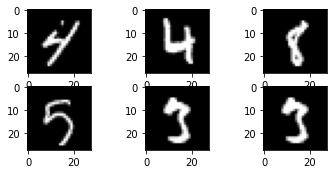

In [5]:
# Plot 6 image,
# we set the color map to grey since our image dataset is grayscale

plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))
 
plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))


plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap= plt.get_cmap('gray'))

plt.subplot(336)
random_nums = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.show()

In [6]:
# lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[1]

In [7]:
# Getting our data in the right shape neededd for Keras
# We need to add a 4th dimenssion to our data thereby changing our 
# original image shape of  (60000, 28,28) to (60000, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [8]:
# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train/=255
x_test/=255

In [10]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
from keras.utils import np_utils

In [12]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
# Lets count the number of columns in our hot encoded matrix
print("Number of Classes:" + str(y_test.shape[1]))

Number of Classes:10


In [14]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [15]:
# Lets see the first value of our target variable
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Lets see the number of classes 
num_classes

10

In [17]:
#Lets see the no of pixcels
num_pixels

784

## Model Building

 We're constructing a simple but efffective CNN that uses 32 filters of size 3x3. We've addeda 2nd CONV layer of 64 filters of the same size 3x3. We then downsample our data to 2x2, here we apply a droupout where p is set to 0.25. We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128. Here we apply a dropout where P is set to 0.5. Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units.

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation ='relu', input_shape = input_shape),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size =(2,2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    
    Dense(num_classes, activation = 'softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [21]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

In [22]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, batch_size = batch_size,
         epochs = epochs, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 - 118s - loss: 0.6034 - accuracy: 0.8100 - val_loss: 0.1978 - val_accuracy: 0.9420 - 118s/epoch - 63ms/step
Epoch 2/10
1875/1875 - 117s - loss: 0.2915 - accuracy: 0.9131 - val_loss: 0.1395 - val_accuracy: 0.9584 - 117s/epoch - 63ms/step
Epoch 3/10
1875/1875 - 117s - loss: 0.2186 - accuracy: 0.9347 - val_loss: 0.1012 - val_accuracy: 0.9698 - 117s/epoch - 62ms/step
Epoch 4/10
1875/1875 - 116s - loss: 0.1688 - accuracy: 0.9509 - val_loss: 0.0831 - val_accuracy: 0.9723 - 116s/epoch - 62ms/step
Epoch 5/10
1875/1875 - 118s - loss: 0.1398 - accuracy: 0.9583 - val_loss: 0.0667 - val_accuracy: 0.9791 - 118s/epoch - 63ms/step
Epoch 6/10
1875/1875 - 119s - loss: 0.1199 - accuracy: 0.9646 - val_loss: 0.0577 - val_accuracy: 0.9805 - 119s/epoch - 64ms/step
Epoch 7/10
1875/1875 - 118s - loss: 0.1045 - accuracy: 0.9684 - val_loss: 0.0512 - val_accuracy: 0.9829 - 118s/epoch - 63ms/step
Epoch 8/10
1875/1875 - 106s - loss: 0.0949 - accuracy: 0.9714 - val_loss: 0.0471 - val_accuracy: 

In [23]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [24]:
score

[0.04155542328953743, 0.9858999848365784]

In [25]:
print(f"Test Loss : {score[0]}")
print(f"Test Accuracy : {score[1]}")

Test Loss : 0.04155542328953743
Test Accuracy : 0.9858999848365784


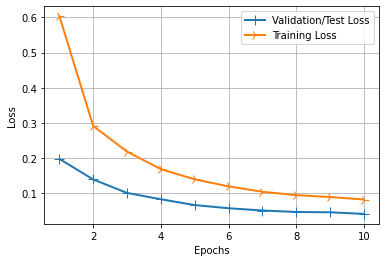

In [27]:
# Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

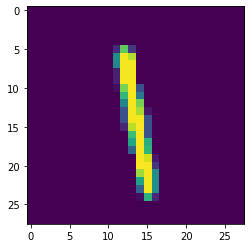

The number is 1


In [54]:
idx = random.randint(0,len(y_test))
plt.imshow(x_test[idx,:])
plt.show()

y_pred = model.predict(x_test[idx,:].reshape(1,28,28))
max = np.argmax(y_pred )

print(f"The number is {max}")